### Cleaning Data

In [70]:
# Install the required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import neattext.functions as nfx
import sklearn
from sklearn.preprocessing import LabelEncoder

In [69]:
!pip install neattext


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 3.5 MB/s eta 0:00:00


In [74]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [66]:
# URL of the dataset
dataset = 'https://raw.githubusercontent.com/Moodify-Project/Machine-Learning/main/Dataset/emotions_new.csv'
# load Dataset
df = pd.read_csv(dataset)

In [ ]:
# Changing column name
df.rename(columns={'label': 'Emotion'}, inplace=True)
# Changing label name
df['Emotion'] = df['Emotion'].replace({0: 'sadness', 1: 'happiness', 2: 'anger', 3: 'worry', 4: 'enthusiasm'})
df.head()

In [ ]:
print(df['Emotion'].value_counts())

In [ ]:
plt.figure(figsize=(12, 6))
palette = sns.color_palette("coolwarm", len(df["Emotion"].unique()))
ax = sns.countplot(y=df["Emotion"], hue=df["Emotion"], palette=palette, legend=False)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width() + 1, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=11, color='black')

plt.title("Emotion Distribution", fontsize=16)
plt.xlabel("Amount", fontsize=14)
plt.ylabel("Emotion", fontsize=14)
plt.show()

### Pre-processing Data

In [72]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [75]:
# Delete rows with empty values or non-string values.
df = df.dropna(subset=['text'])
df = df[df['text'].apply(lambda x: isinstance(x, str))]

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = nfx.remove_urls(text) # remove url
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text) # remove hashtags
    text = re.sub(r'\bRT\b', '', text) # remove RT
    text = re.sub(r'\s+', ' ', text).strip()
    text = nfx.remove_numbers(text) # remove number
    text = nfx.remove_special_characters(text) # remove special character
    text = text.lower() # lowercase
    text = nfx.remove_stopwords(text) # Delete stopwords
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])  # Lemmatization
    return text

# Apply text cleaning to the 'text' column.
df['Clean_text'] = df['text'].apply(clean_text)

df[['text', 'Clean_text']]


,text,Clean_text
0,i just feel really helpless and heavy hearted,feel helpless heavy hearted
1,ive enjoyed being able to slouch about relax a...,ive enjoyed able slouch relax unwind frankly n...
2,i gave up my internship with the dmrg and am f...,gave internship dmrg feeling distraught
3,i dont know i feel so lost,dont know feel lost
4,i am a kindergarten teacher and i am thoroughl...,kindergarten teacher thoroughly weary job take...
...,...,...
401952,going to watch boy in the striped pj's hope i ...,going watch boy striped pjs hope dont cry
401953,"gave the bikes a thorough wash, degrease it an...",gave bike thorough wash degrease grease think ...
401954,"had SUCH and AMAZING time last night, McFly we...",amazing time night mcfly incredible
401955,Succesfully following Tayla!!,succesfully following tayla


In [ ]:
# Save the cleaned DataFrame to a CSV file
df[['Emotion', 'Clean_text']].to_csv('emotions_clean.csv', index=False)

### Exploratory Data Analysis (EDA)

In [3]:
# URL of the dataset
cleandataset = 'https://raw.githubusercontent.com/Moodify-Project/Machine-Learning/main/Dataset/emotions_clean.csv'
# load Dataset
df_emotion = pd.read_csv(cleandataset)

In [4]:
# Display the first few rows of the dataset
print(df_emotion.head())

# Display basic information about the dataset
print(df_emotion.info())

# Summary statistics
print(df_emotion.describe())

# Check for missing values
print(df_emotion.isnull().sum())

   Emotion                                         Clean_text
0    worry                        feel helpless heavy hearted
1  sadness  ive enjoyed able slouch relax unwind frankly n...
2    worry            gave internship dmrg feeling distraught
3  sadness                                dont know feel lost
4    worry  kindergarten teacher thoroughly weary job take...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401957 entries, 0 to 401956
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Emotion     401957 non-null  object
 1   Clean_text  401875 non-null  object
dtypes: object(2)
memory usage: 6.1+ MB
None
          Emotion Clean_text
count      401957     401875
unique          5     369098
top     happiness       feel
freq       146276        138
Emotion        0
Clean_text    82
dtype: int64


In [5]:
# Removing rows that contain missing values:
df_emotion.dropna(subset=['Emotion', 'Clean_text'], inplace=True)

print(df_emotion.isnull().sum())

Emotion       0
Clean_text    0
dtype: int64


In [6]:
#Keyword extraction (common words)
from collections import Counter

def extract_keywords(text,num=50):
    tokens = [ tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

emotion_list = df_emotion['Emotion'].unique().tolist()

In [7]:
#Sadness
sadness_list = df_emotion[df_emotion['Emotion'] == 'sadness']['Clean_text'].dropna().tolist()
sadness_docx = ' '.join(sadness_list)

#Enthusiasm
enthusiasm_list = df_emotion[df_emotion['Emotion'] == 'enthusiasm']['Clean_text'].tolist()
enthusiasm_docx = ' '.join(enthusiasm_list)

#Worry
worry_list = df_emotion[df_emotion['Emotion'] == 'worry']['Clean_text'].tolist()
worry_docx = ' '.join(worry_list)

#Happiness
happiness_list = df_emotion[df_emotion['Emotion'] == 'happiness']['Clean_text'].tolist()
happiness_docx = ' '.join(happiness_list)

#Anger
anger_list = df_emotion[df_emotion['Emotion'] == 'anger']['Clean_text'].tolist()
anger_docx = ' '.join(anger_list)

In [8]:
# Extract Keyword
keyword_sadness = extract_keywords(sadness_docx)
keyword_enthusiasm = extract_keywords(enthusiasm_docx)
keyword_worry = extract_keywords(worry_docx)
keyword_happiness = extract_keywords(happiness_docx)
keyword_anger = extract_keywords(anger_docx)

In [9]:
# Keyword Graph
def plot_most_common_words(mydict,emotion_name):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(10,8))
    plt.title("Plot of {}".format(emotion_name))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()

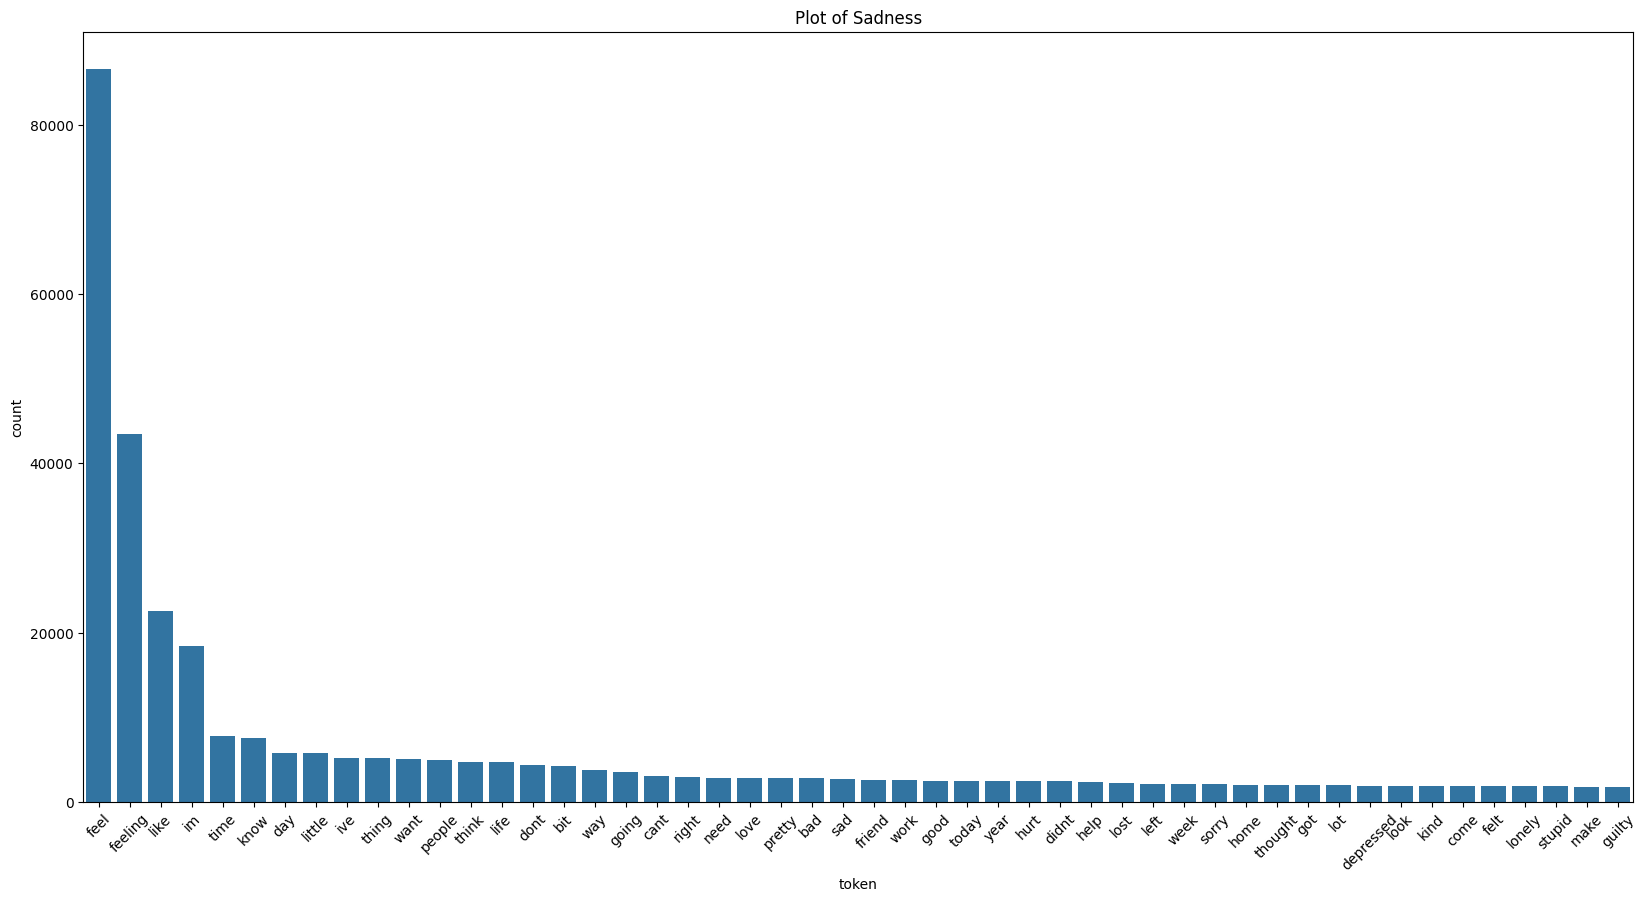

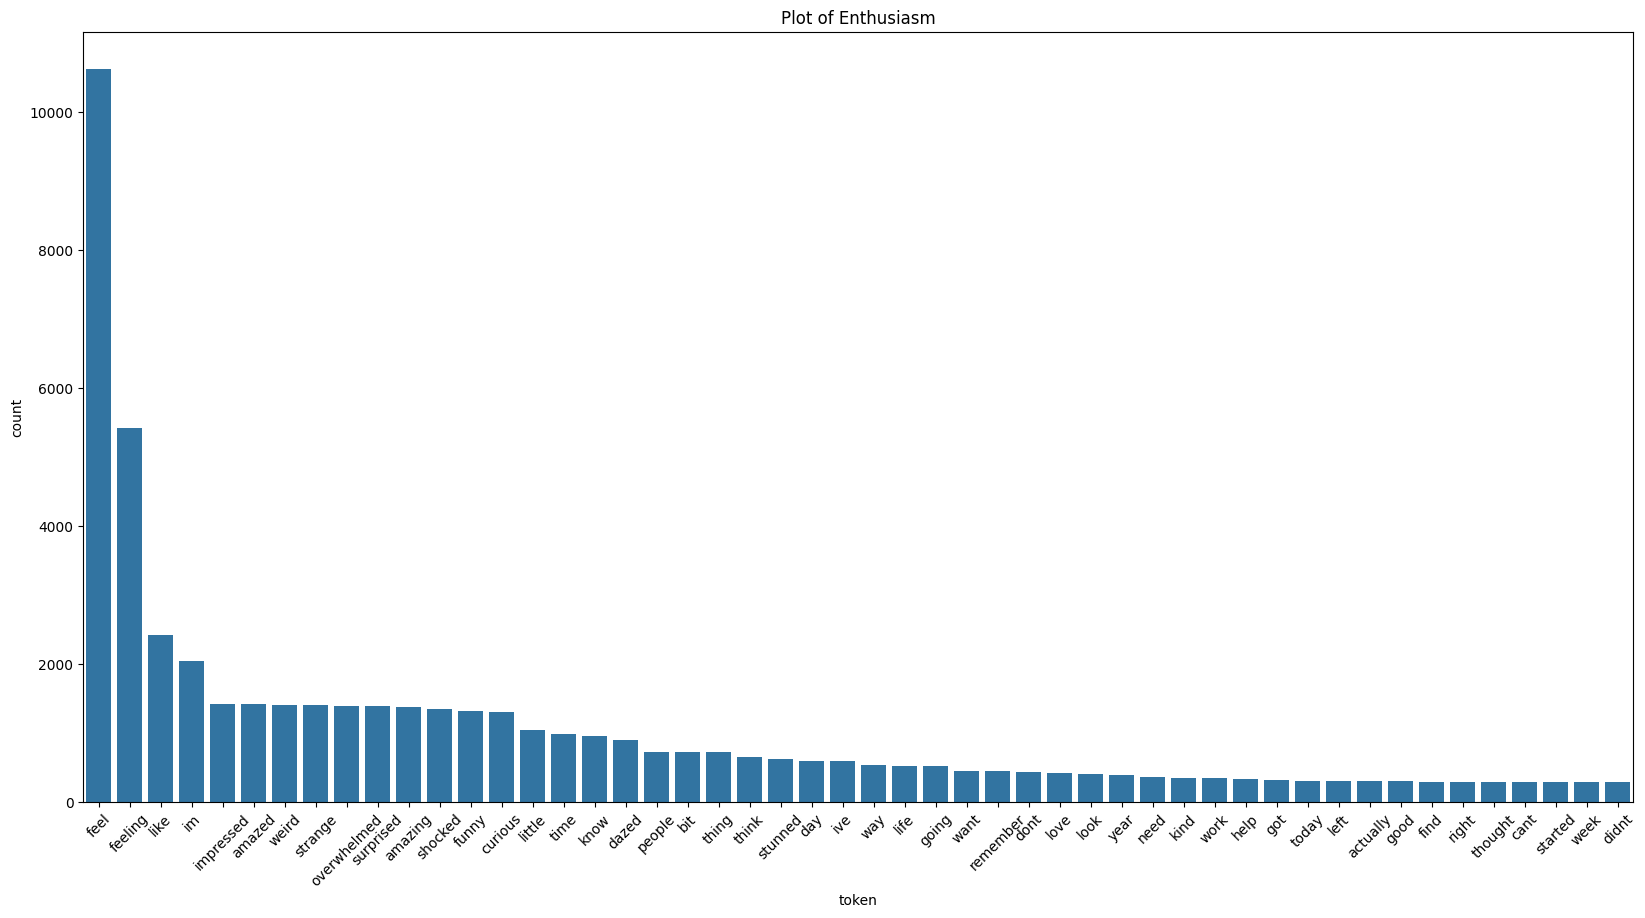

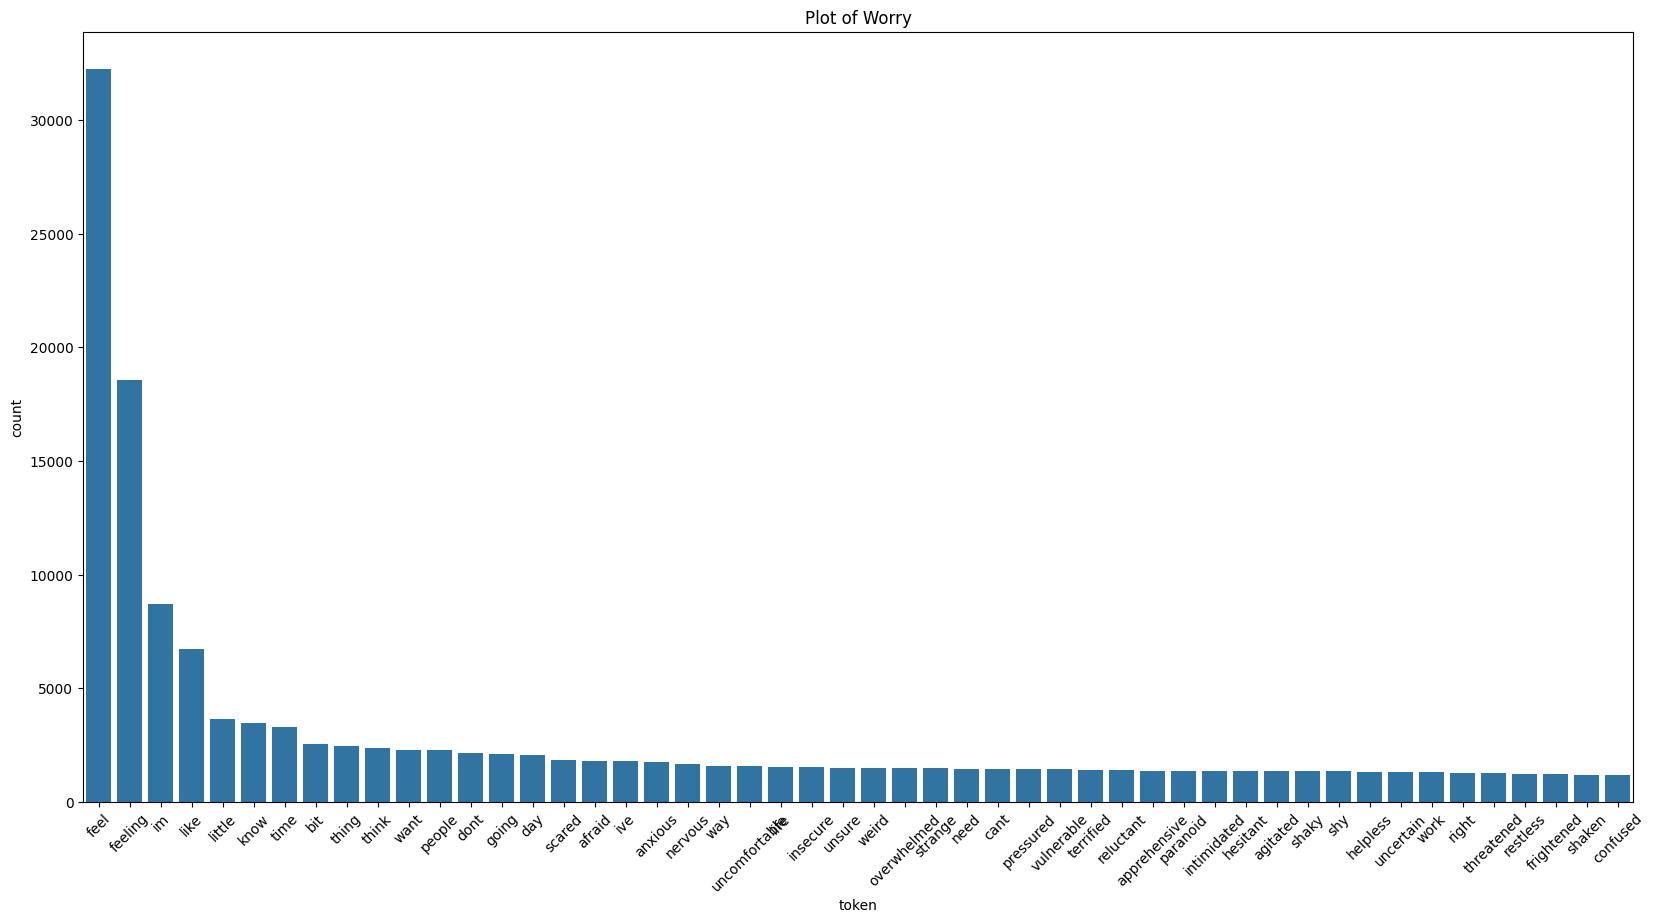

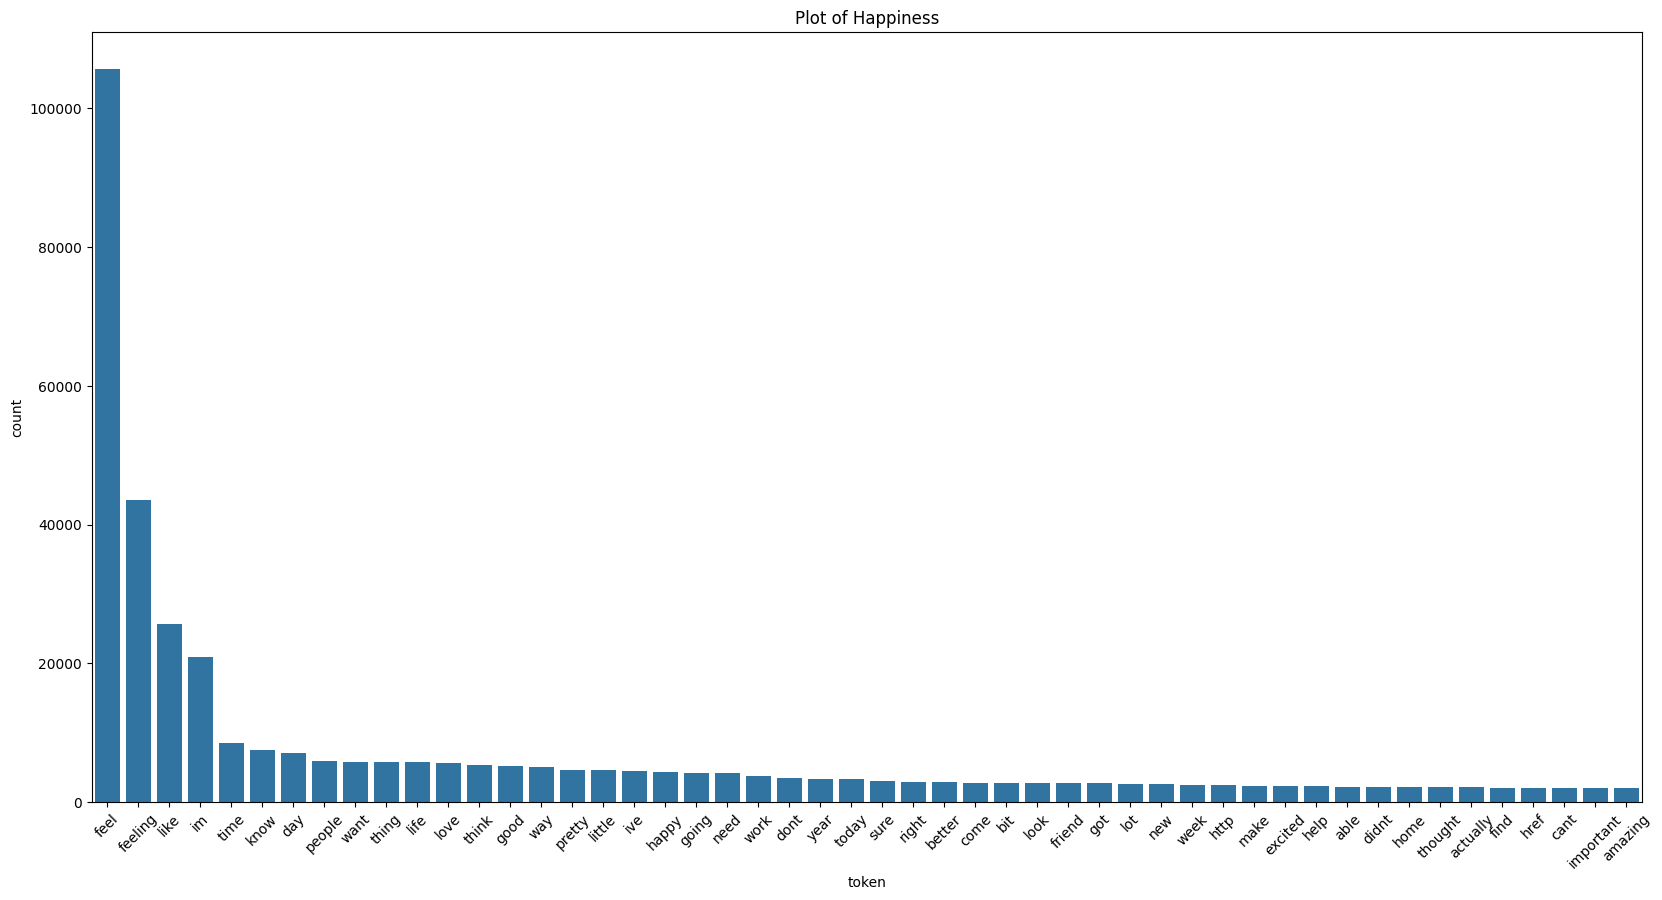

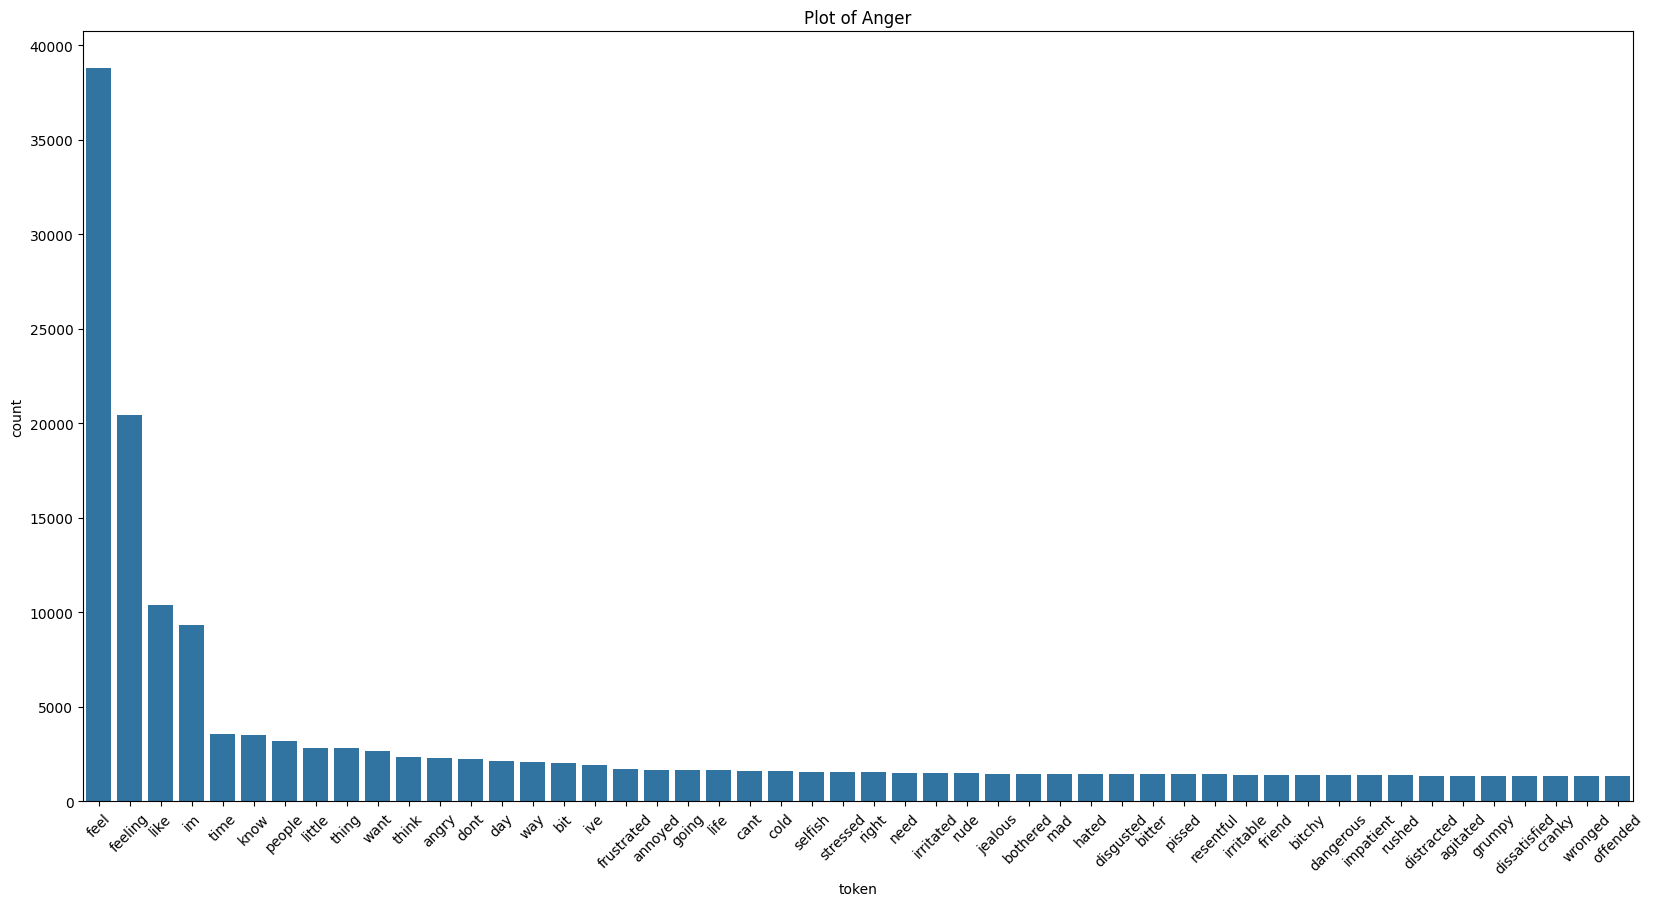

In [10]:
keywords = [
    ("Sadness", keyword_sadness),
    ("Enthusiasm", keyword_enthusiasm),
    ("Worry", keyword_worry),
    ("Happiness", keyword_happiness),
    ("Anger", keyword_anger)
]

for label, data in keywords:
    plot_most_common_words(data, label)

In [ ]:
# Word Cloud
from wordcloud import WordCloud
def plot_wordcloud(docx):
    mywordcloud = WordCloud(width=800, height=400, background_color='white').generate(docx)
    plt.figure(figsize=(10,8))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.title('Word Cloud of All Emotion')
    plt.axis('off')
    plt.show()

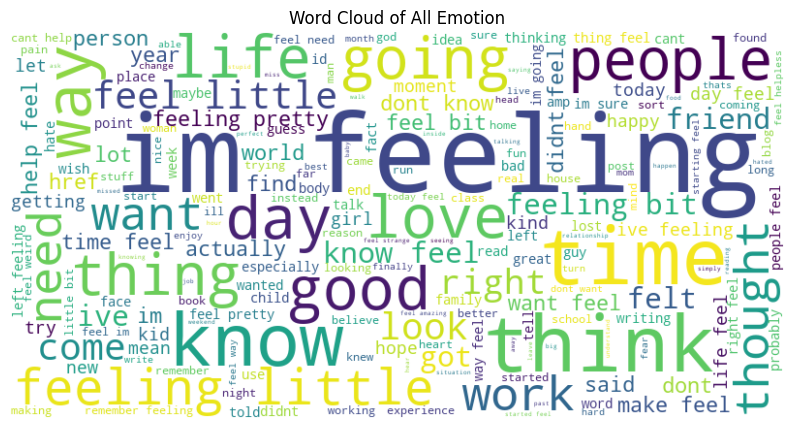

In [ ]:
combined_docx = sadness_docx + " " + enthusiasm_docx + " " + worry_docx + " " + happiness_docx + " " + anger_docx + " "
plot_wordcloud(combined_docx)

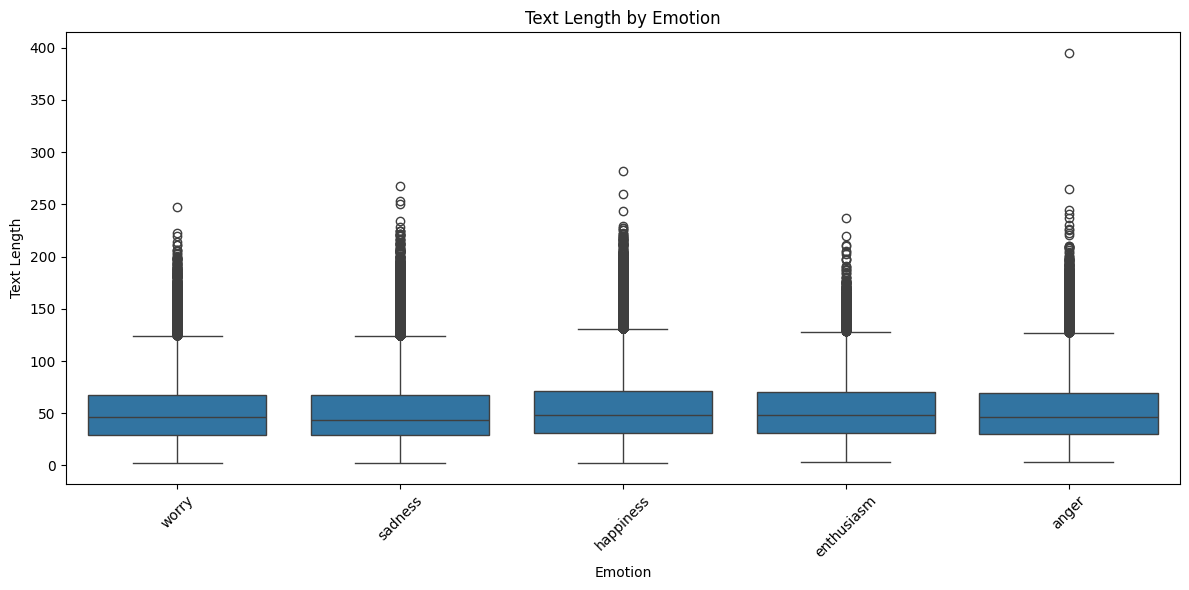

In [ ]:
# Calculate the length of each text
df_emotion['text_length'] = df_emotion['Clean_text'].apply(len)

# Plot text length distribution by Emotion
plt.figure(figsize=(10, 8))
sns.boxplot(x='Emotion', y='text_length', data=df_emotion)
plt.title('Text Length by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Text Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Split Data**

In [11]:
from sklearn.model_selection import train_test_split

X = df_emotion['Clean_text']
y = df_emotion['Emotion']

# Separate data into training (80%) and temporary (20%).
X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42)

print(f"Train shape: {X_train.shape}, Temporary shape: {X_temp.shape}")

Train shape: (321500,), Temporary shape: (80375,)


In [12]:
# Separate the temporary data into validation (50%) and test (50%).
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42)
print(f"Validation shape: {X_val.shape}, Test shape: {X_test.shape}")

Validation shape: (40187,), Test shape: (40188,)


In [13]:
print("Example data in X_train:")
print(X_train.head())

print("\nExample data in X_test:")
print(X_test.head())

print("\nExample data in X_val:")
print(X_val.head())

Example data in X_train:
87438     feel restless busyness starting detract spirit...
45486     feel probably obnoxious example war glorification
399817          look like great time happy birthday bd girl
337220                            feel afraid im team night
387991    ive got fairly flat route available problem lo...
Name: Clean_text, dtype: object

Example data in X_test:
387075                          sorry hear wish word better
359230    sahm leaf feeling isolated rest world found im...
167807    stop trying fill void god surrogate continue f...
151325    feel improve dont joke dont like gossip im liv...
135775                               feel seriously pleased
Name: Clean_text, dtype: object

Example data in X_val:
395553                             im trying moving morning
381856    feel strong need shield harm compared son deve...
224802    thought going feel numb way aid station foot s...
311428    need handle feeling continue address issue lis...
88447                 

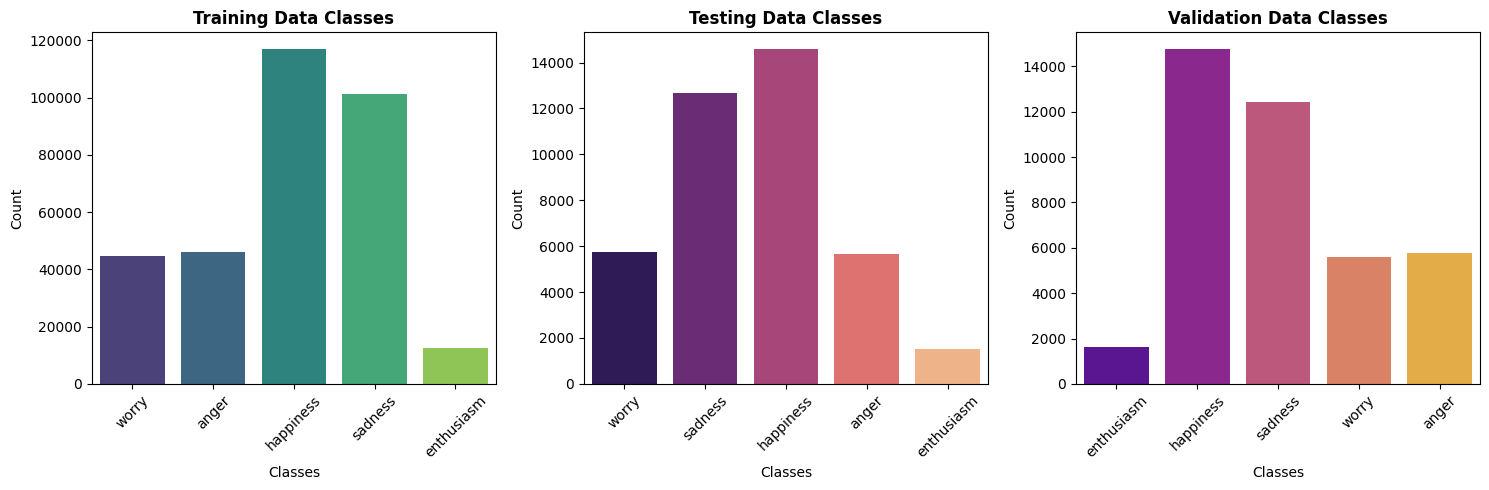

In [ ]:
# Visualize classes counts
plt.figure(figsize=(15, 5))
# Subplot for training dataset
plt.subplot(131)
sns.countplot(x=y_train, palette='viridis', hue=y_train, legend=False)
plt.title("Training Data Classes", fontweight='bold')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Subplot for testing dataset
plt.subplot(132)
sns.countplot(x=y_test, palette='magma', hue=y_test, legend=False)
plt.title("Testing Data Classes", fontweight='bold')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Subplot for validation dataset
plt.subplot(133)
sns.countplot(x=y_val, palette='plasma', hue=y_val, legend=False)
plt.title("Validation Data Classes", fontweight='bold')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Label Encoding**

In [14]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [15]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [16]:
y_train

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

**Tokenization**

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [18]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis=0))

print(tokenizer.word_index)

{'feel': 1, 'feeling': 2, 'like': 3, 'im': 4, 'time': 5, 'know': 6, 'little': 7, 'day': 8, 'people': 9, 'thing': 10, 'want': 11, 'think': 12, 'life': 13, 'ive': 14, 'way': 15, 'dont': 16, 'bit': 17, 'going': 18, 'love': 19, 'need': 20, 'good': 21, 'pretty': 22, 'work': 23, 'right': 24, 'cant': 25, 'today': 26, 'year': 27, 'friend': 28, 'help': 29, 'didnt': 30, 'got': 31, 'look': 32, 'come': 33, 'happy': 34, 'lot': 35, 'thought': 36, 'week': 37, 'home': 38, 'make': 39, 'find': 40, 'sure': 41, 'felt': 42, 'left': 43, 'new': 44, 'getting': 45, 'better': 46, 'person': 47, 'kind': 48, 'actually': 49, 'http': 50, 'world': 51, 'away': 52, 'started': 53, 'bad': 54, 'said': 55, 'moment': 56, 'start': 57, 'night': 58, 'long': 59, 'able': 60, 'remember': 61, 'try': 62, 'sad': 63, 'href': 64, 'trying': 65, 'end': 66, 'place': 67, 'ill': 68, 'family': 69, 'tell': 70, 'hope': 71, 'hurt': 72, 'let': 73, 'making': 74, 'god': 75, 'post': 76, 'hate': 77, 'morning': 78, 'amazing': 79, 'blog': 80, 'read':

In [19]:
X_datasets = [X_train, X_test, X_val]
sequences = [tokenizer.texts_to_sequences(data) for data in X_datasets]

sequences_train, sequences_test, sequences_val = sequences

In [20]:
for idx, (text, sequence) in enumerate(zip(X_train.iloc[:1], sequences_train[:1])):
    print(f"Original Text: {text}\nTokenized Sequence: {sequence}\n")

Original Text: feel restless busyness starting detract spiritual growth
Tokenized Sequence: [1, 416, 9703, 157, 15328, 1799, 1914]



In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [29]:
X_train, X_test, X_val = [pad_sequences(seq, maxlen=256, truncating='pre')
                           for seq in (sequences_train, sequences_test, sequences_val)]
vocab_size = len(tokenizer.index_word) + 1
print(f"Vocabulary size: {vocab_size} words")

Vocabulary size: 68885 words


### LSTM Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense, SpatialDropout1D, Bidirectional
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

In [82]:
 def create_model(vocab_size):
    # Define model
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Embedding(vocab_size, 128, input_length=X_train.shape[1]),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv1D(filters=128,
                               kernel_size=5,
                               padding='valid',
                               activation='relu',
                               strides=1),
        tf.keras.layers.MaxPooling1D(pool_size=4),
        tf.keras.layers.LSTM(128),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Activation('softmax')
    ])

    adam = Adam(learning_rate=0.001)
    # Compile model
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy'],
	  )

    return model

In [83]:
# Create and print the model summary
model = create_model(vocab_size)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 256, 128)            │       8,817,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 252, 128)            │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 63, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             645 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,031,557 (34.45 MB)

 Trainable params: 9,031,557 (34.45 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
total_samples = len(y_train)
class_counts = y_train.sum(axis=0)
class_weights = {i: total_samples / (5 * count) for i, count in enumerate(class_counts)}

# Early stopping
earlyStop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True,
)

In [85]:
# Fit model
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    batch_size = 128,
                    epochs=15,
                    callbacks=[earlyStop],
                    class_weight=class_weights
                   )

Epoch 1/15
2512/2512 ━━━━━━━━━━━━━━━━━━━━ 54s 21ms/step - accuracy: 0.8146 - loss: 0.4683 - val_accuracy: 0.9244 - val_loss: 0.1698
Epoch 2/15
2512/2512 ━━━━━━━━━━━━━━━━━━━━ 82s 21ms/step - accuracy: 0.9325 - loss: 0.1646 - val_accuracy: 0.9272 - val_loss: 0.1593
Epoch 3/15
2512/2512 ━━━━━━━━━━━━━━━━━━━━ 83s 21ms/step - accuracy: 0.9440 - loss: 0.1346 - val_accuracy: 0.9283 - val_loss: 0.1623
Epoch 4/15
2512/2512 ━━━━━━━━━━━━━━━━━━━━ 84s 22ms/step - accuracy: 0.9505 - loss: 0.1153 - val_accuracy: 0.9274 - val_loss: 0.1788
Epoch 5/15
2512/2512 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - accuracy: 0.9553 - loss: 0.1032 - val_accuracy: 0.9254 - val_loss: 0.1909


In [39]:
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])
print("Training Loss:", history.history['loss'][-1])
print("Validation Loss:", history.history['val_loss'][-1])

Training Accuracy: 0.9550264477729797
Validation Accuracy: 0.9258466958999634
Training Loss: 0.10511049628257751
Validation Loss: 0.20063437521457672


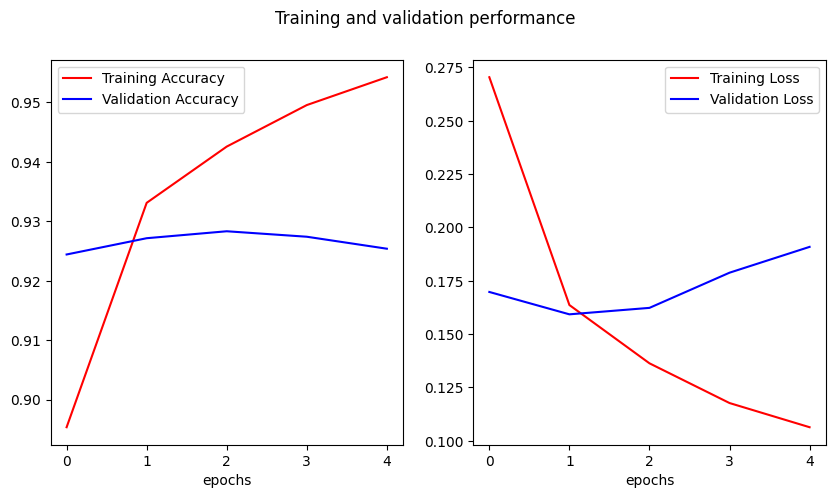

In [86]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation performance')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

In [ ]:
# Classify custom sample
def predict(sentence,modelxx):
    # print(sentence)
    sentence = clean_text(sentence)
    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=256, truncating='pre')
    result = le.inverse_transform(np.argmax(modelxx.predict(sentence), axis=-1))[0]
    proba =  np.max(modelxx.predict(sentence))
    print(f"{result} : {proba}\n\n")

In [ ]:
# Saving The Model
import pickle
with open('tokenizer.pickle', 'wb') as f:
    pickle.dump(tokenizer, f)

with open('labelEncoder.pickle', 'wb') as f:
    pickle.dump(le, f)


model.save('Emotion Detection.keras')

### BiLSTM Model

In [41]:
def create_bimodel(vocab_size):
    # Define model
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, 128, input_length=X_train.shape[1]),
        tf.keras.layers.SpatialDropout1D(0.2),
        tf.keras.layers.Bidirectional(LSTM(60, return_sequences=True, recurrent_dropout=0.2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Bidirectional(LSTM(32)),
        tf.keras.layers.Dense(5, activation='softmax', kernel_regularizer=l2(0.01))
    ])

    adam = Adam(learning_rate=0.001)
    # Compile model
    model.compile(
		loss='categorical_crossentropy',
		optimizer='adam',
		metrics=['accuracy'],
	)

    return model

In [43]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    verbose=1,
    batch_size=256,
    epochs=15,
    callbacks=[earlyStop],
    class_weight=class_weights
)

Epoch 1/15
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 1022s 809ms/step - accuracy: 0.7081 - loss: 0.7330 - val_accuracy: 0.9254 - val_loss: 0.2239
Epoch 2/15
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 971s 753ms/step - accuracy: 0.9319 - loss: 0.2203 - val_accuracy: 0.9302 - val_loss: 0.2170
Epoch 3/15
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 989s 759ms/step - accuracy: 0.9440 - loss: 0.1840 - val_accuracy: 0.9312 - val_loss: 0.2127


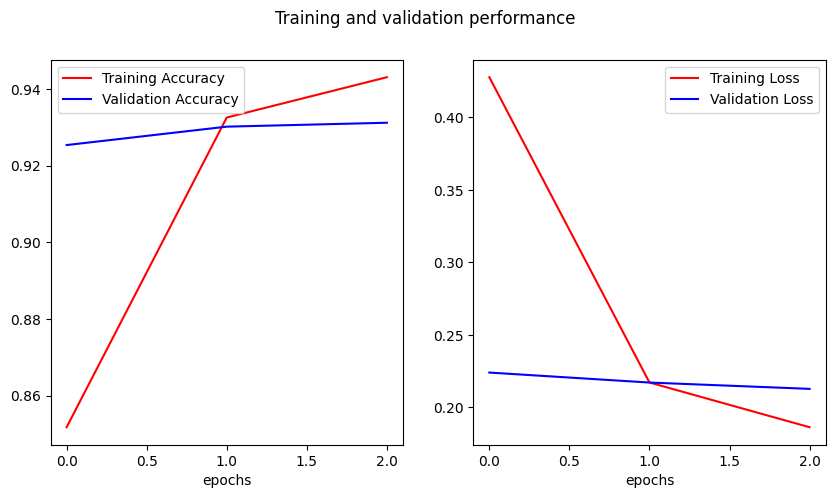

In [44]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation performance')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

In [53]:
# Menyimpan model dalam format SavedModel menggunakan export
model.export('saved_model')



Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256), dtype=tf.float32, name='keras_tensor_10')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  139325195330560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139325173404544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139325177230288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139325177232928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139325196743456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139325173297600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139325196734656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139325196579968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139325196581376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139325175097904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139325175098608: TensorS

In [56]:
from google.colab import files
import shutil

shutil.make_archive('/content/saved_model', 'zip', '/content', 'saved_model')

files.download('/content/saved_model.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
from tensorflow.keras.models import load_model

# Memuat model yang sudah disimpan
modelxx = load_model('bimodel.keras')

def predict(sentence, modelxx):
    # Preprocess the sentence
    sentence = clean_text(sentence)
    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=256, truncating='pre')

    # Prediksi hasil dan probabilitas
    predictions = modelxx.predict(sentence)[0]  # Ambil hasil prediksi untuk kalimat tersebut
    proba = np.array(predictions)  # Probabilitas untuk setiap kelas emosi

    # Inversi hasil encoding label
    labels = le.classes_  # Kelas emosi yang sudah didefinisikan (misalnya 'happy', 'sad', dll.)

    # Tampilkan probabilitas setiap emosi
    for i, label in enumerate(labels):
        print(f"{label}: {proba[i]*100:.2f}%")

    # Menampilkan hasil prediksi dengan probabilitas tertinggi
    result = labels[np.argmax(proba)]
    max_proba = np.max(proba)
    print(f"\nPrediksi Emosi Terbesar: {result} dengan probabilitas {max_proba*100:.2f}%\n\n")


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 17 variables whereas the saved optimizer has 32 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [88]:
# Misalnya model Anda sudah dilatih dan disimpan sebagai 'modelxx'
# Teks yang ingin diprediksi
sample_text = "I am absolutely furious and disgusted by everything that's happening. The sheer audacity of people to act so recklessly and selfishly drives me to the edge of my patience. How dare they trample over the rights and feelings of others without a second thought? The world seems to be filled with so much hatred and ignorance, and I can't stand it anymore. It’s infuriating how people turn a blind eye to the suffering they cause, pretending as if their actions don’t matter. I can't help but despise the way things are, the way people have become so cold and indifferent, and how no one seems to care about the real consequences of their selfishness."

# Memanggil fungsi untuk memprediksi teks
predict(sample_text, modelxx)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
anger: 93.99%
enthusiasm: 2.10%
happiness: 0.36%
sadness: 3.02%
worry: 0.53%

Prediksi Emosi Terbesar: anger dengan probabilitas 93.99%




In [77]:
# Menyimpan model dalam format SavedModel menggunakan export
model.export('final_model')

Saved artifact at 'final_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256), dtype=tf.float32, name='keras_tensor_10')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  139325195330560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139325173404544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139325177230288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139325177232928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139325196743456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139325173297600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139325196734656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139325196579968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139325196581376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139325175097904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139325175098608: TensorS

In [78]:
shutil.make_archive('/content/final_model', 'zip', '/content', 'final_model')

files.download('/content/final_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
y_pred = np.argmax(model.predict(X_test), axis=1)

1256/1256 ━━━━━━━━━━━━━━━━━━━━ 243s 193ms/step


In [46]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets